In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
%matplotlib inline

In [3]:
train_df = pd.read_csv('data/inter/train_clean_2.csv')
train_df.sample(3)

FileNotFoundError: [Errno 2] File data/inter/train_clean_2.csv does not exist: 'data/inter/train_clean_2.csv'

## The PdDistrict Column

#### Let's list all the PdDistricts:

In [5]:
all_districts = train_df.PdDistrict.unique()
all_districts, len(all_districts)

NameError: name 'train_df' is not defined

#### We have 10 PdDistricts

### PdDistricts Map Visualization

#### To get the boundaries & coordinates of each PdDistrict, I refered to:
    - the GeoJson file from this link: https://data.sfgov.org/Public-Safety/Current-Police-Districts/wkhw-cjsf
    - this Image : https://s.hdnux.com/photos/46/44/02/10109103/27/940x940.jpg
    
**Notice**: I didn't find a way to permanently show the names of the PdDistricts in the Folium Map, so I just made normal Folium Markers with tooltips showing the name of the PdDistrict when the mouse hovers over them

In [66]:
districts_coordinates = {}
districts_coordinates['MISSION'] = [37.755, -122.42]
districts_coordinates['NORTHERN'] = [37.787, -122.433]
districts_coordinates['PARK'] = [37.76, -122.45]
districts_coordinates['INGLESIDE'] = [37.727, -122.435]
districts_coordinates['RICHMOND'] = [37.775, -122.48]
districts_coordinates['CENTRAL'] = [37.795, -122.41]
districts_coordinates['TARAVAL'] = [37.736, -122.48]
districts_coordinates['TENDERLOIN'] = [37.78, -122.414]
districts_coordinates['SOUTHERN'] = [37.772, -122.4]
districts_coordinates['BAYVIEW'] = [37.732, -122.39]

In [1]:
city_coordinates=[37.77397, -122.4312]
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
#folium.Marker([37.732, -122.39], tooltip='MISSION').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
m

NameError: name 'folium' is not defined

#### Next, Let's list the PdDistricts where most crimes occur

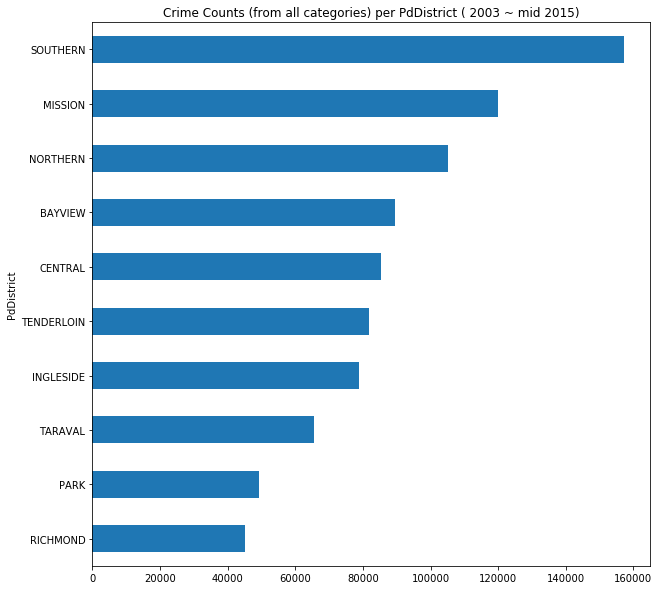

In [68]:
gb = train_df.groupby('PdDistrict')['Descript'].count().sort_values()
gb.plot(kind='barh', figsize=(10,10), title='Crime Counts (from all categories) per PdDistrict ( 2003 ~ mid 2015)')

#### Let's now list the crime counts per category for each district in the last year 2014( to see what types of crimes occur most in each district)

In [4]:
y = 2014
for pd in all_districts:
    gb = train_df[ (train_df.Year == y) & (train_df.PdDistrict == pd) ].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(10,10), title=f'Crime Counts per Category for PdDistrict {pd} ({y})')
    plt.show()

NameError: name 'all_districts' is not defined

#### It is clear that crimes from category 'LARCENY/THEFT' are always on the Top Two in all PdDistricts

#### Another way to better visualize it, is to plot the crime counts of each category per PdDistrict

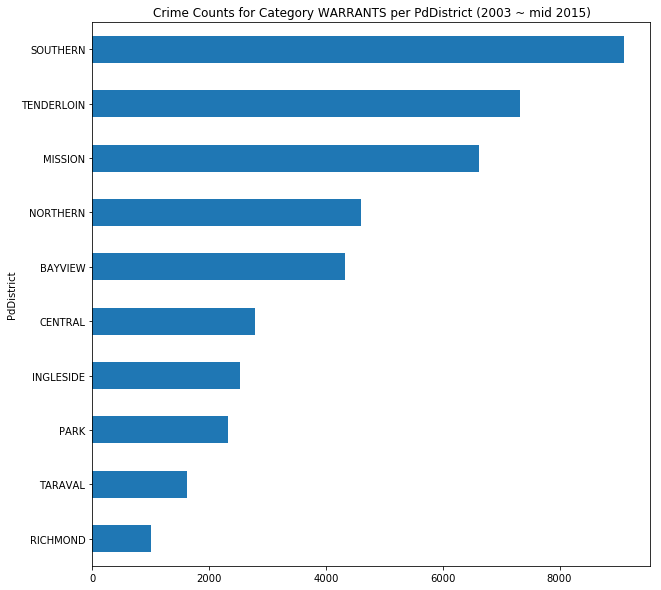

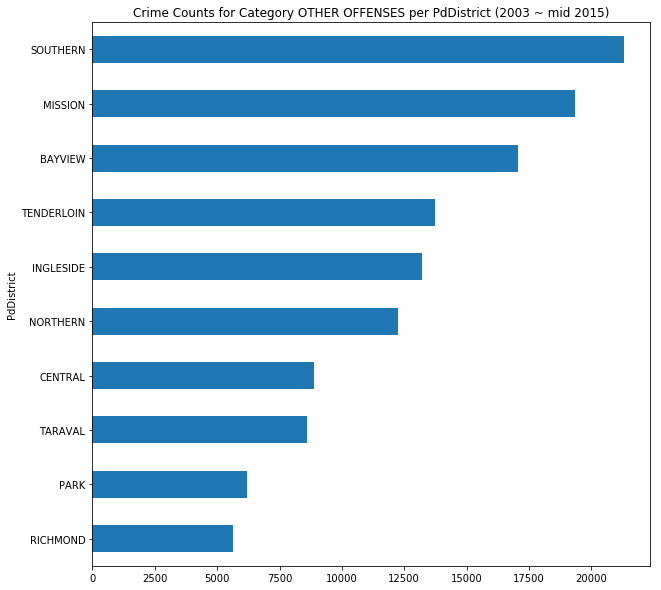

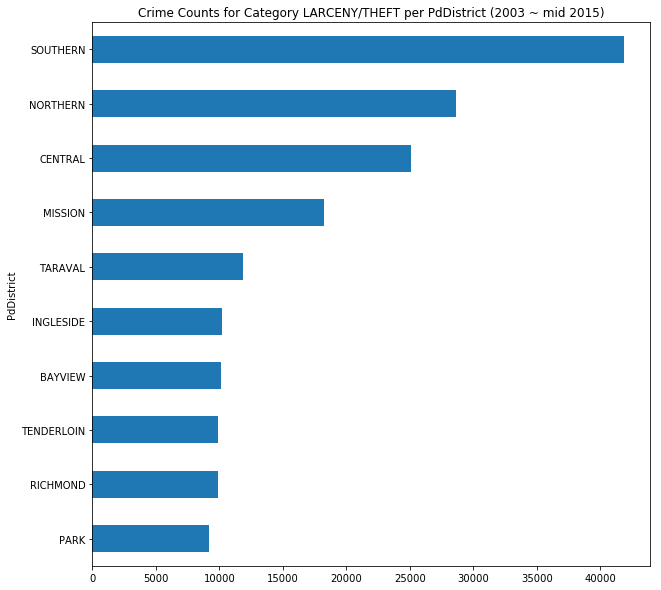

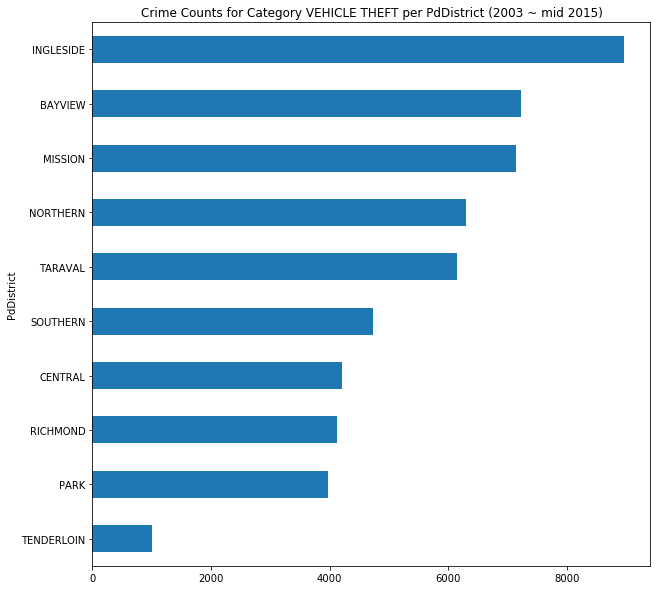

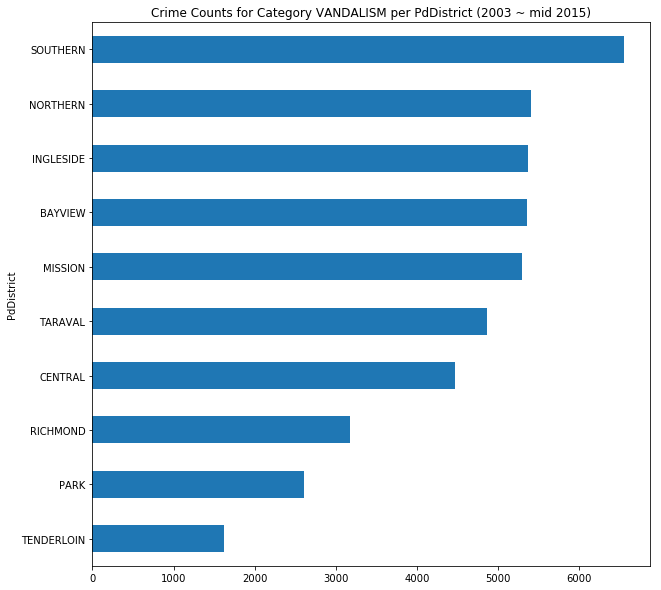

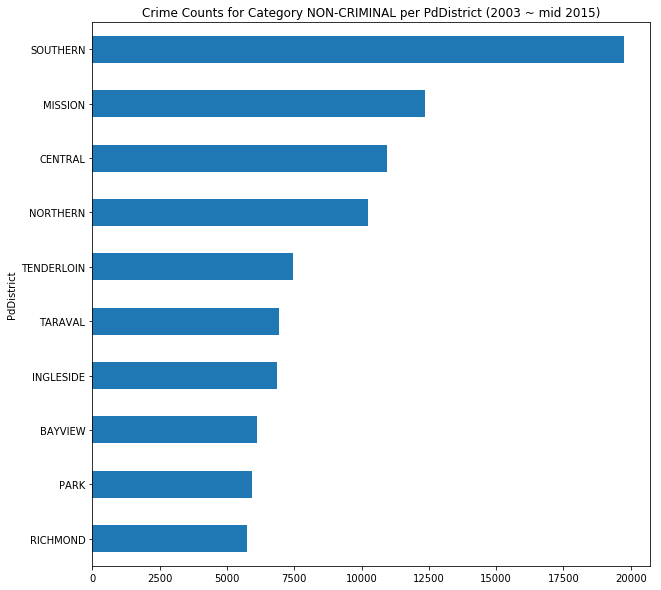

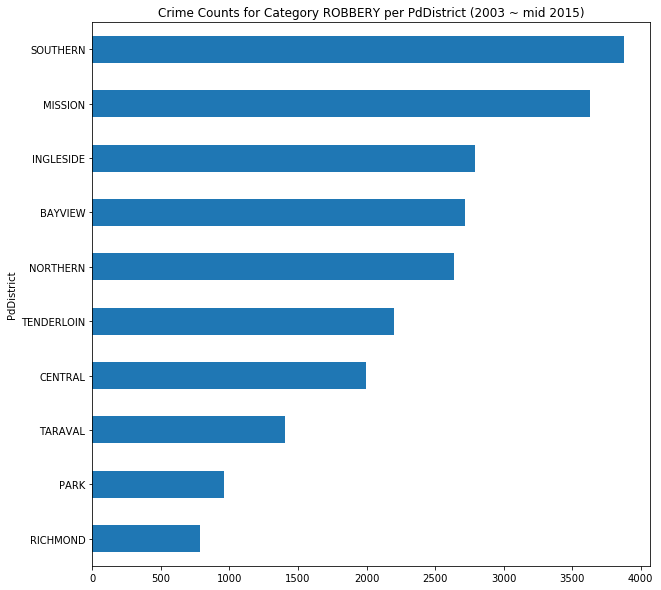

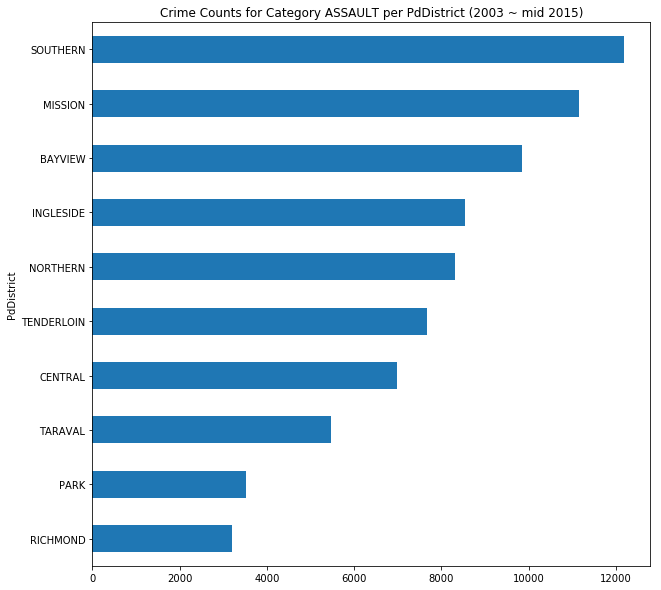

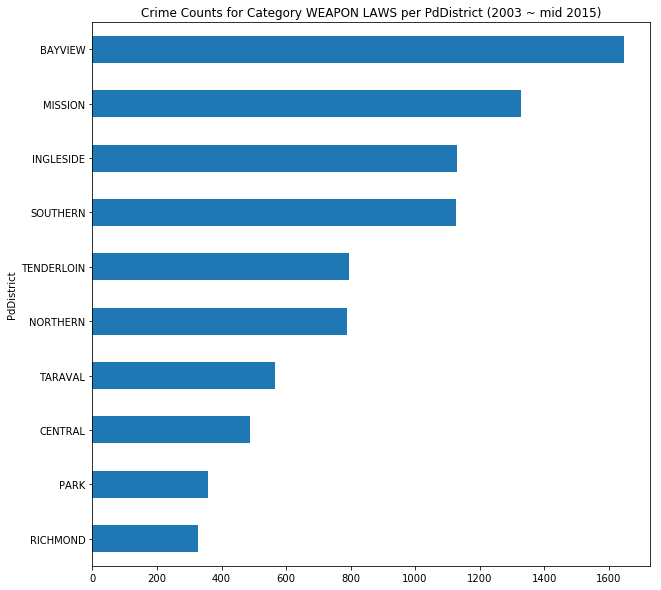

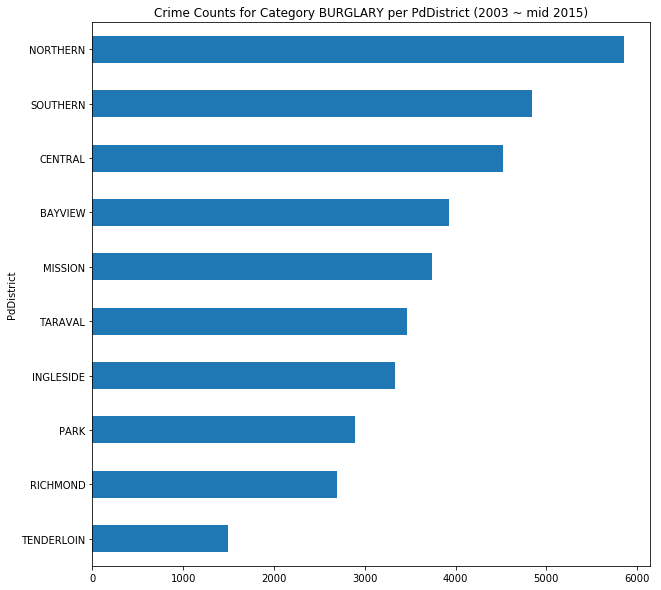

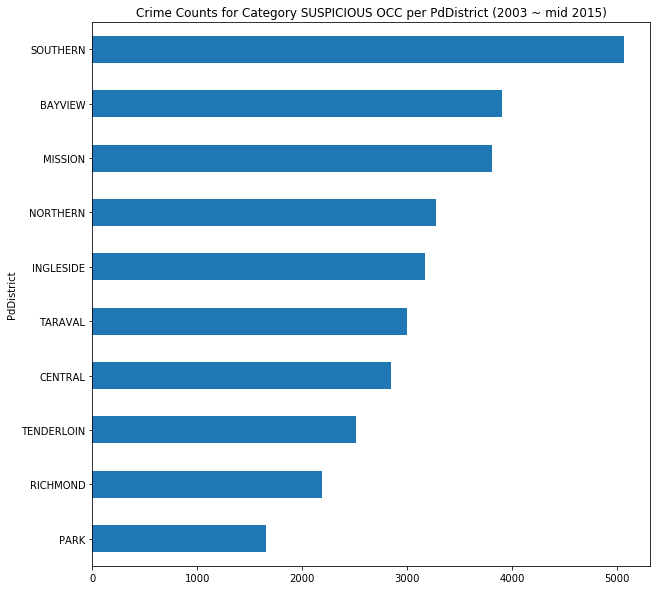

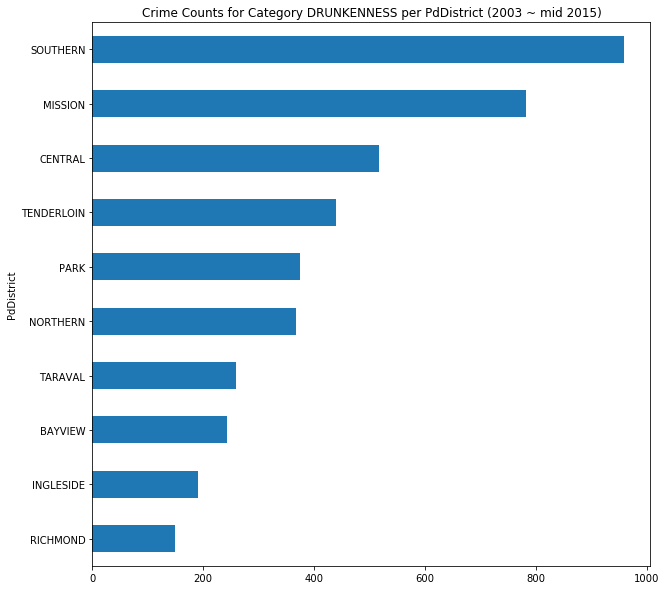

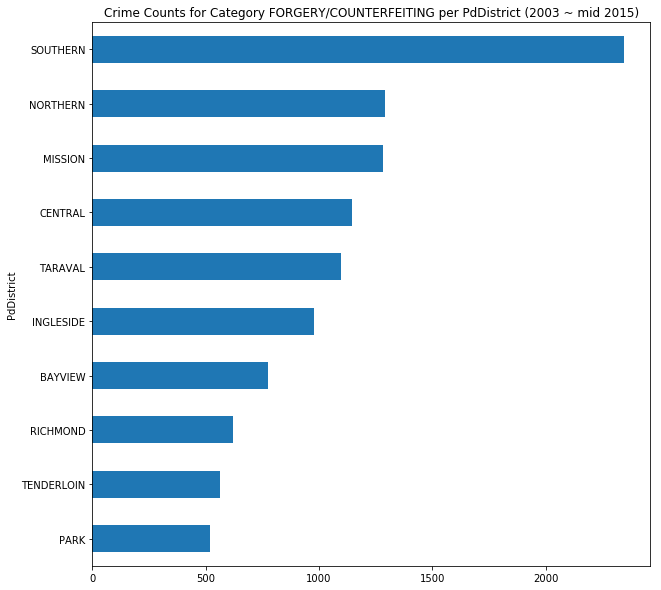

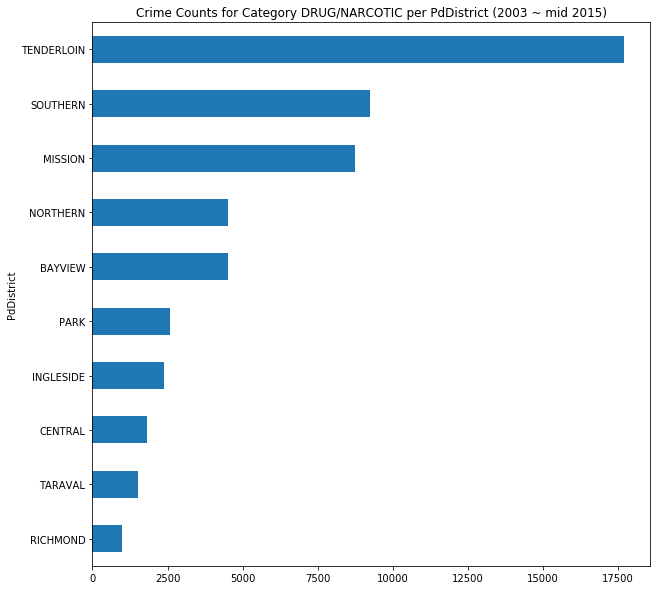

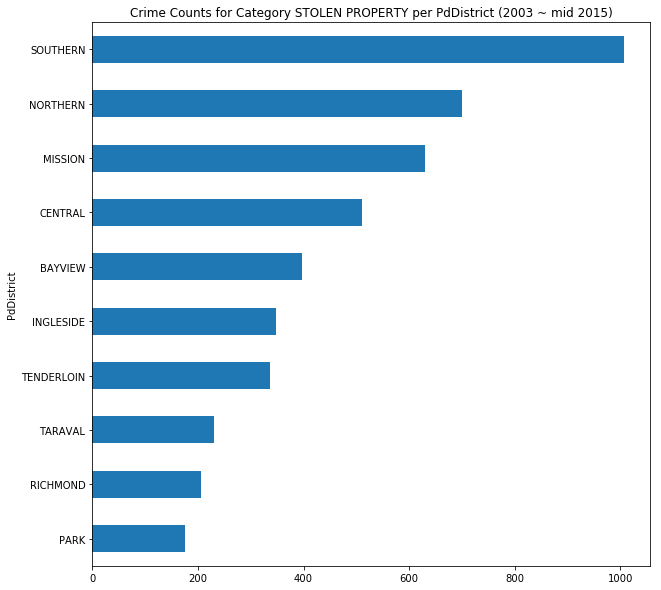

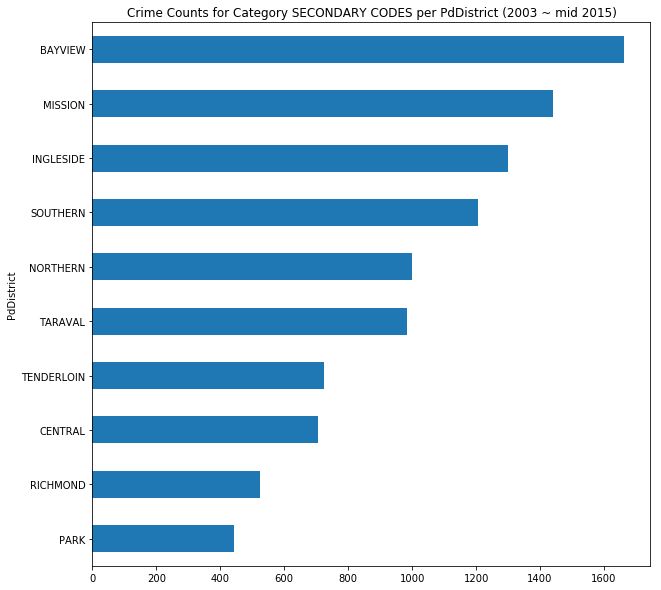

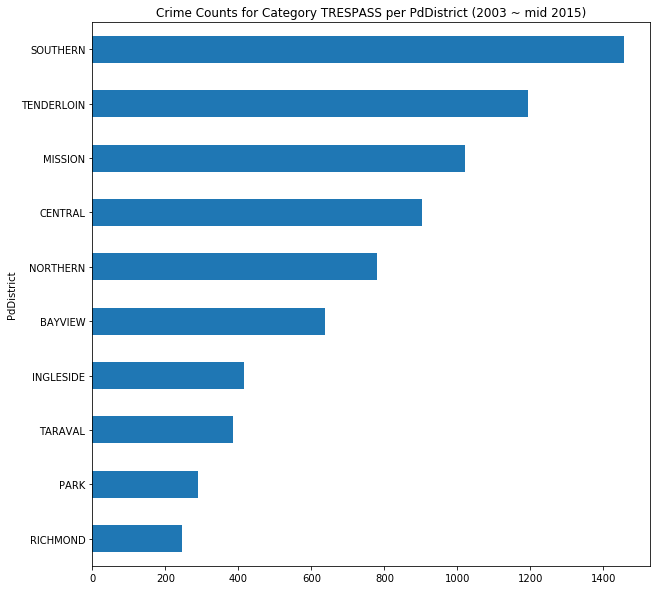

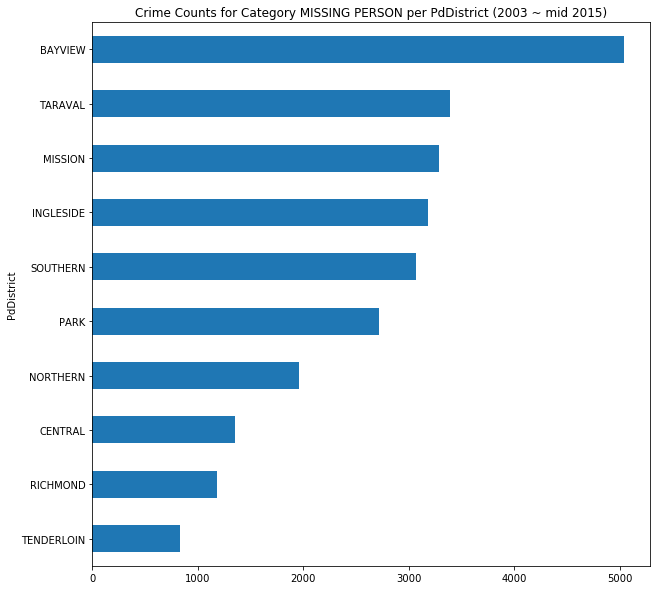

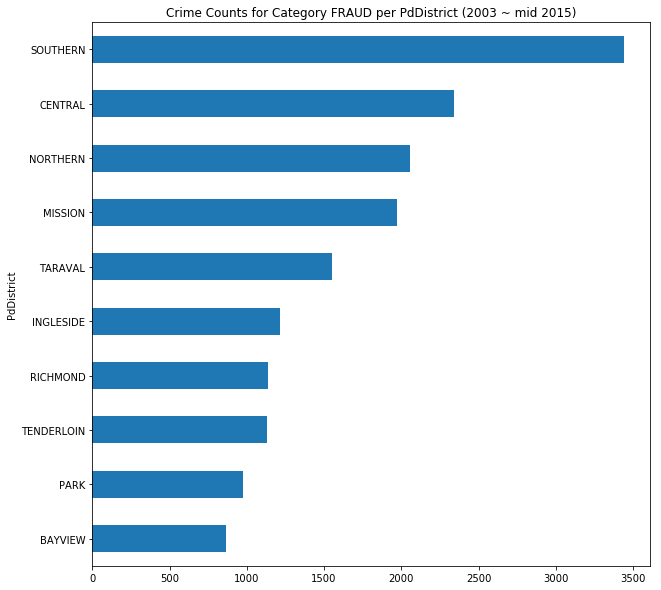

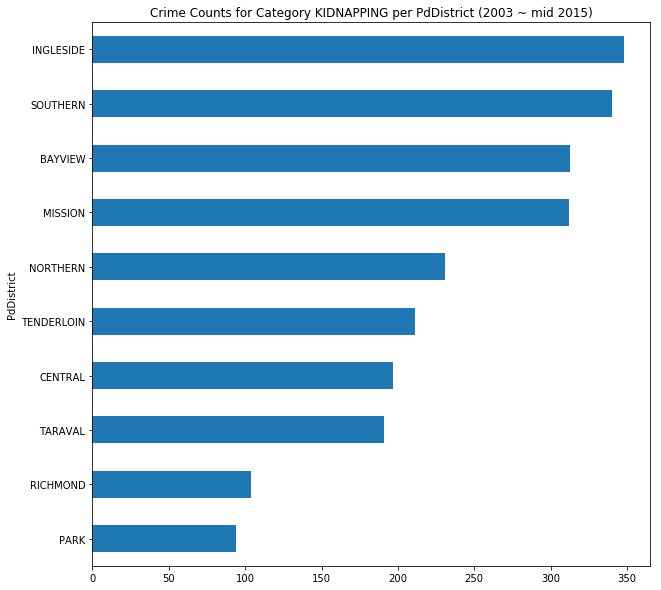

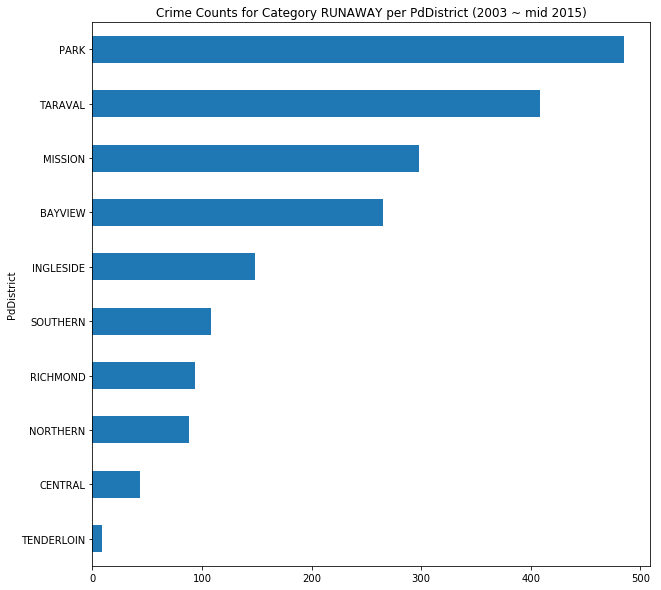

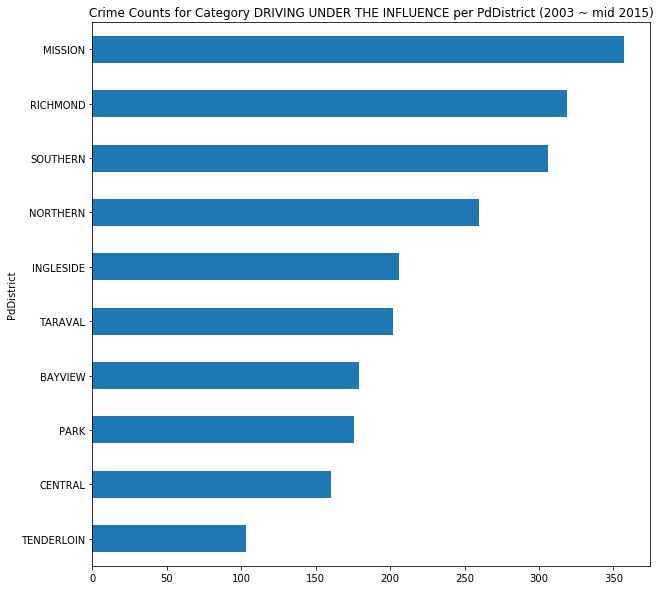

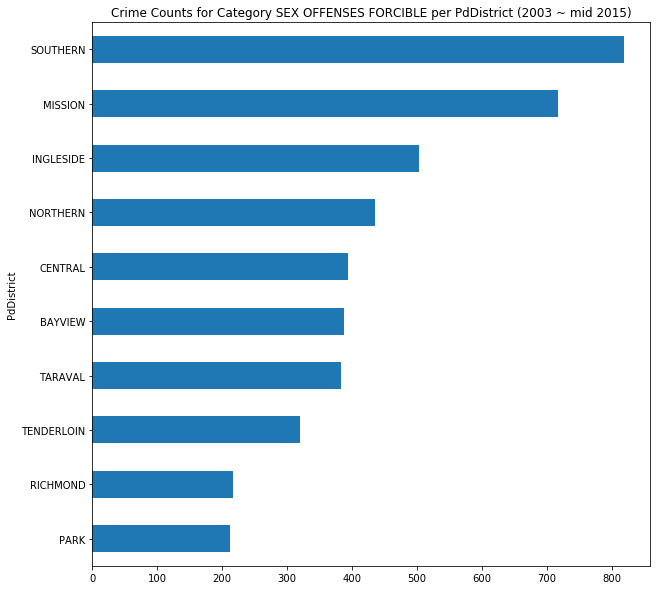

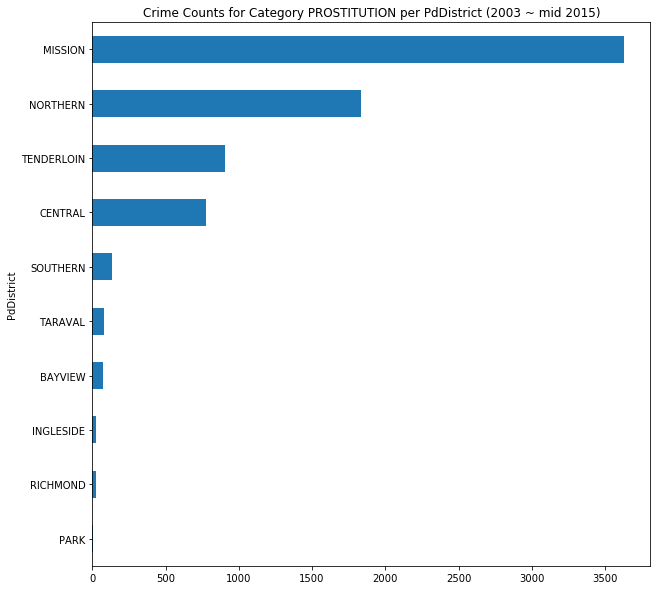

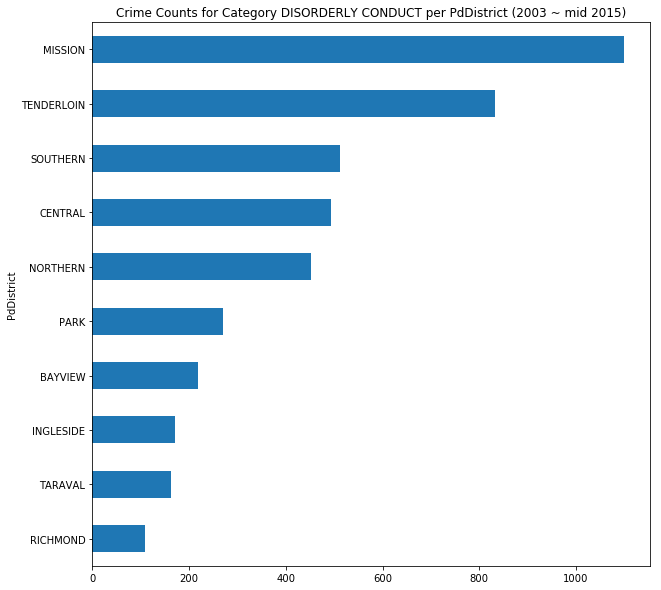

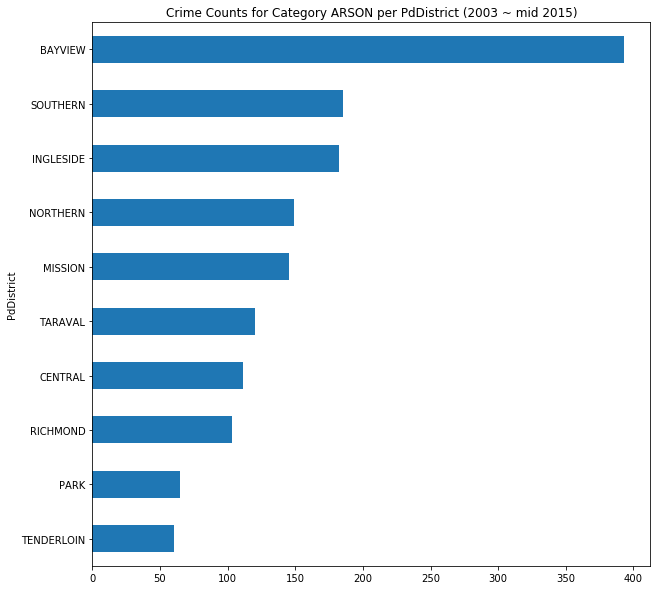

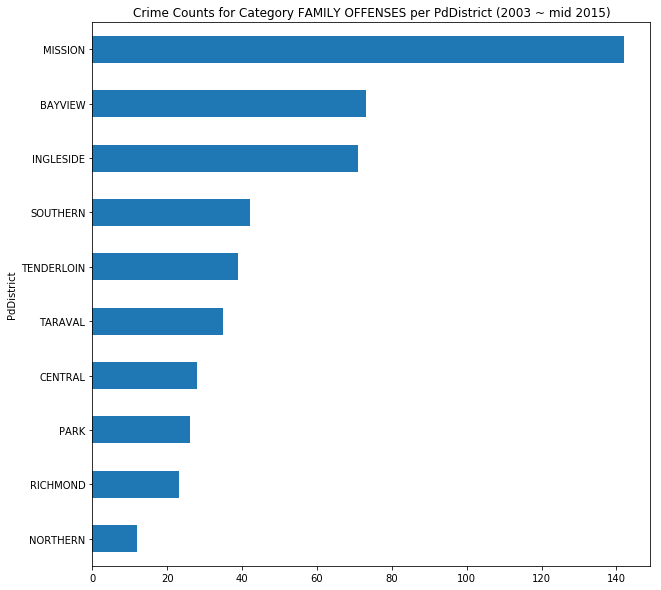

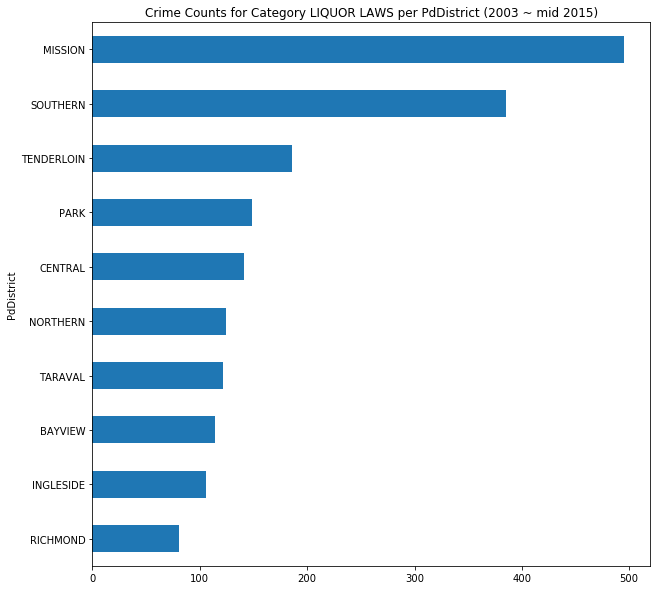

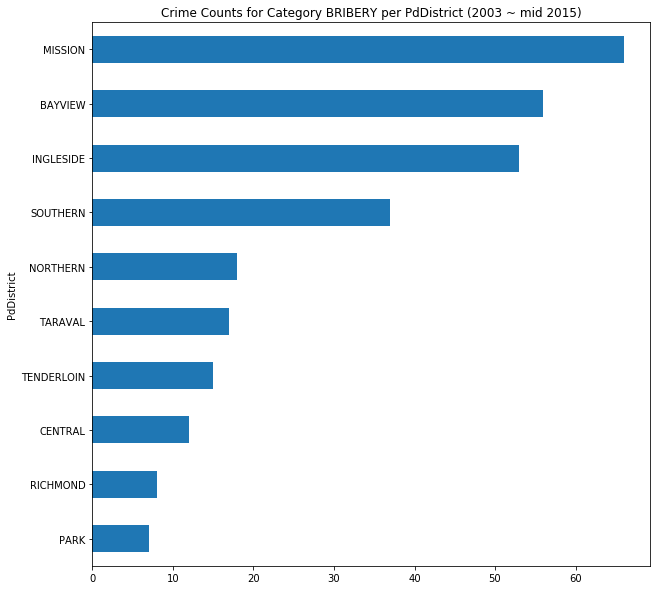

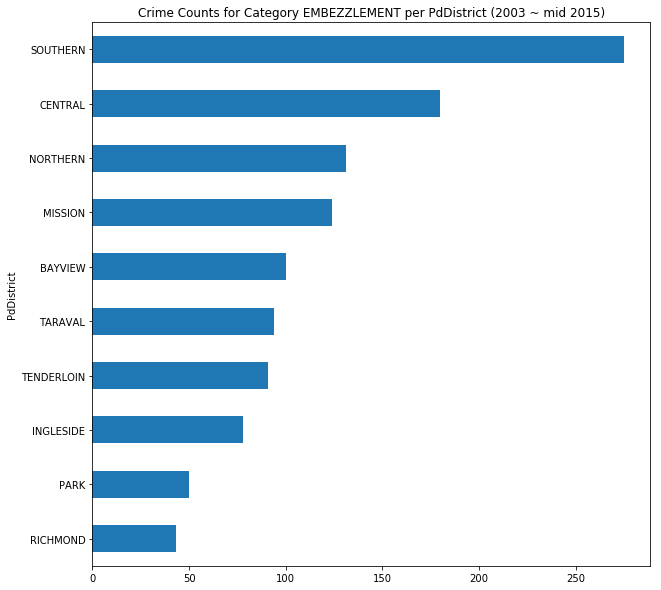

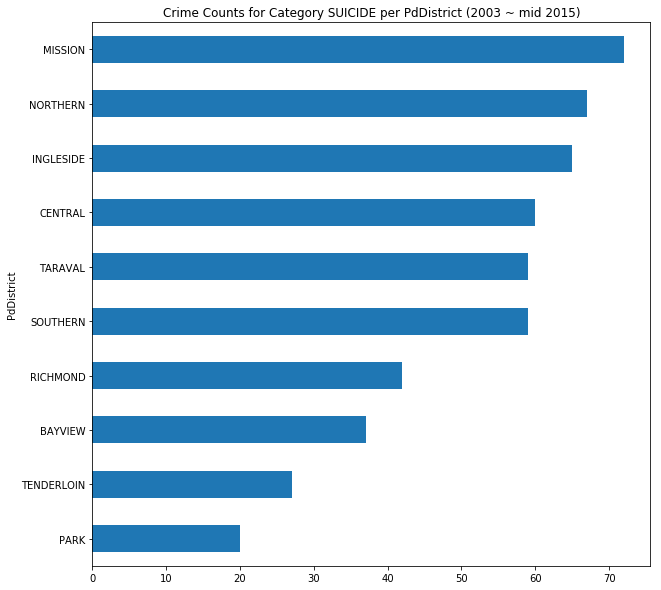

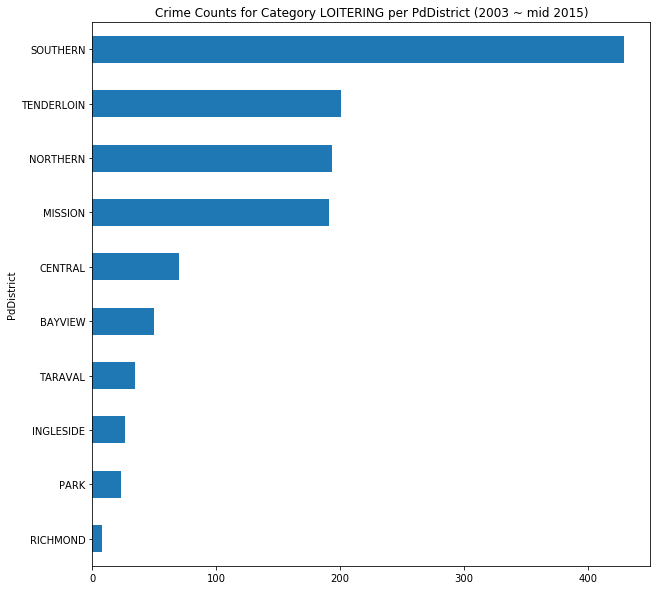

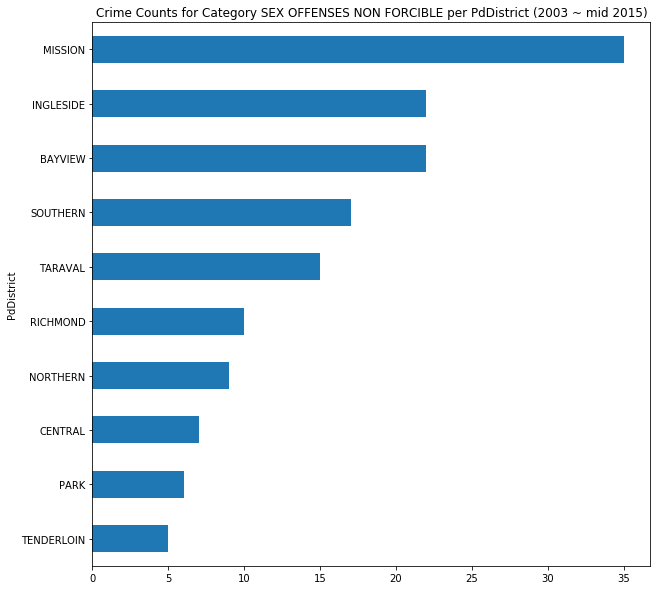

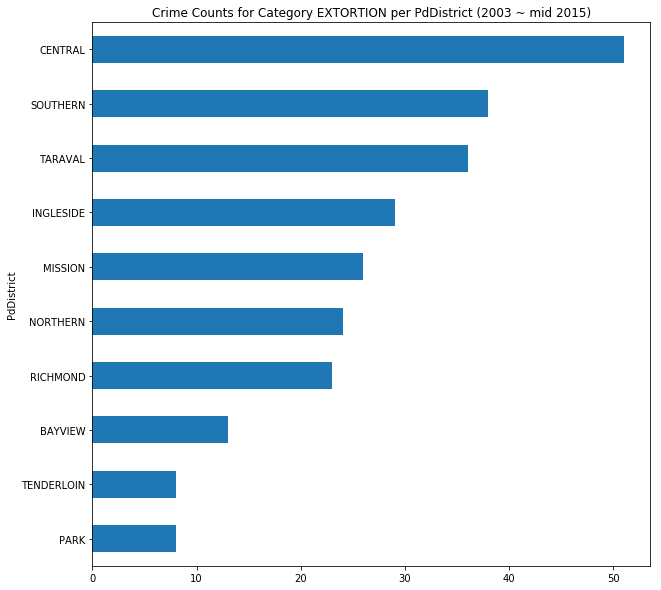

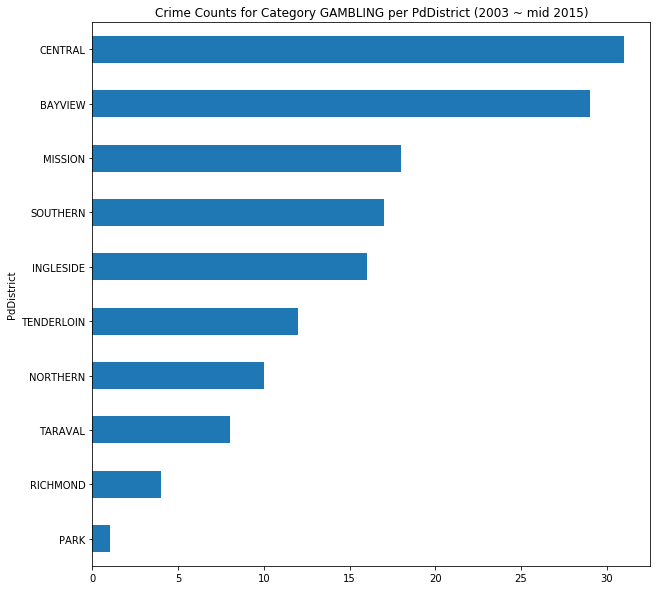

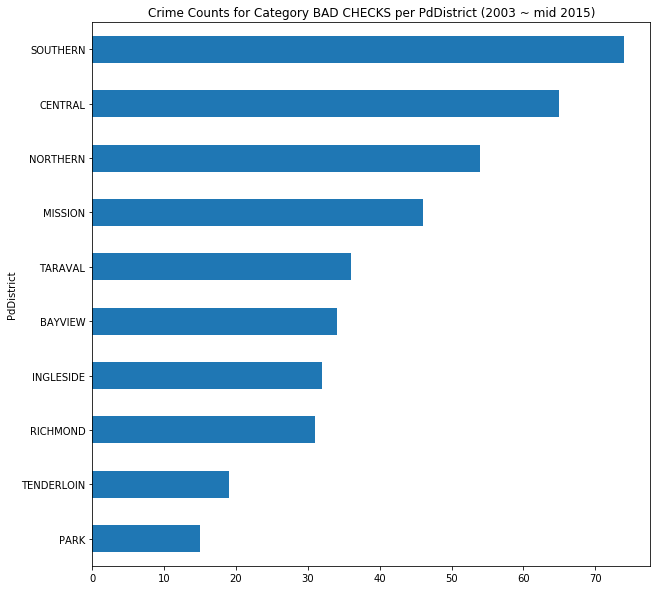

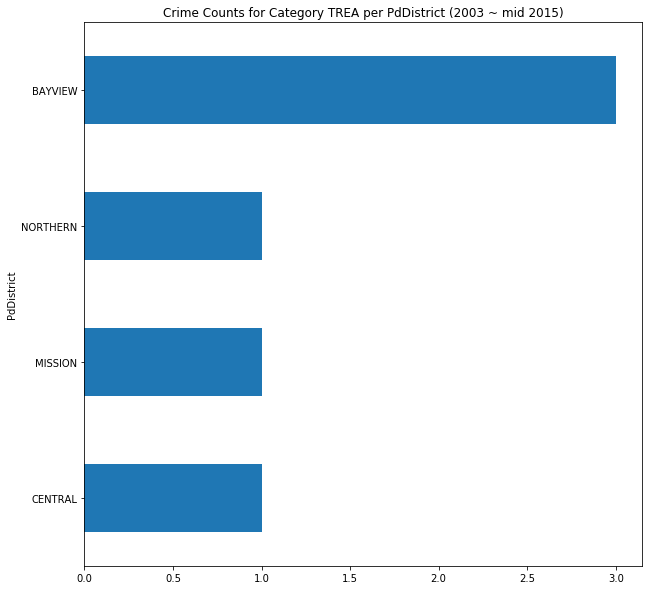

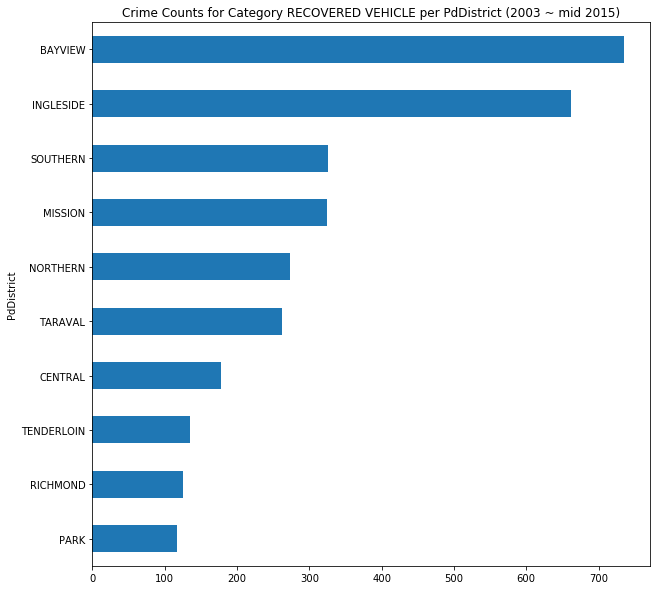

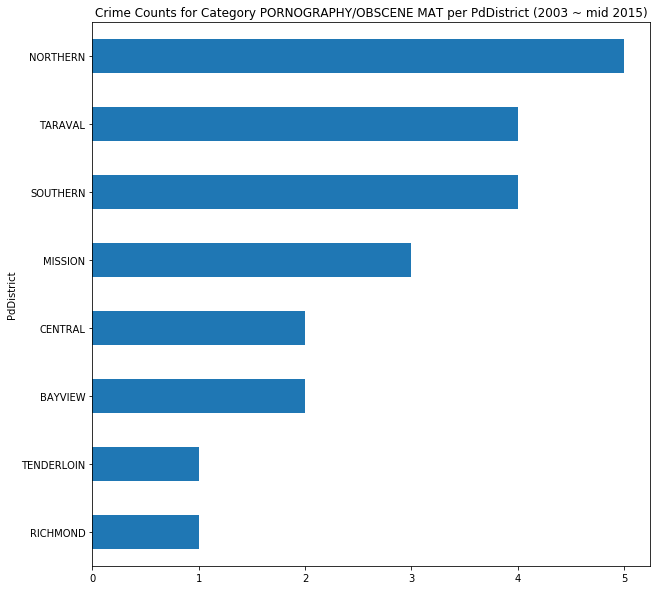

In [26]:
all_cats = train_df.Category.unique()
for c in all_cats:
    gb = train_df[train_df.Category == c].groupby('PdDistrict')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(10,10), title=f'Crime Counts for Category {c} per PdDistrict (2003 ~ mid 2015)')
    plt.show()

### Heat Map Visualizations of Thefts/Robberies/Burglaries/Kidnappings

#### From here, we can do endless visualizations, let's concentrate on few categories from last year 2014:
    - Theft/Larceny
    - Robbery
    - Burglary
    - Kidnapping


In [80]:
thefts = train_df[ (train_df.Year == 2014) & (train_df.Category == 'LARCENY/THEFT')][['Y','X']]
robberies = train_df[ (train_df.Year == 2014) & (train_df.Category == 'ROBBERY')].[['Y','X']]
burglaries = train_df[ (train_df.Year == 2014) & (train_df.Category == 'BURGLARY')].[['Y','X']]
kidnappings = train_df[ (train_df.Year == 2014) & (train_df.Category == 'KIDNAPPING')].[['Y','X']]

#### Thefts

- From the Map below, we can see that Thefts occur a lot in the north-eastern part of the city ( CENTRAL, NORTHERN, SOUTHERN, TENDERLOIN )

In [84]:
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(thefts[['Y','X']].as_matrix()).add_to(m)

m

#### Robberies

In [85]:
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(robberies[['Y','X']].as_matrix()).add_to(m)

m

#### Burglaries

In [86]:
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(burglaries[['Y','X']].as_matrix()).add_to(m)

m

#### Kidnappings

In [87]:
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(kidnappings[['Y','X']].as_matrix()).add_to(m)

m